In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#call_data
df = pd.read_excel('dataA.xlsx')

In [4]:
df.head()

,REFERENCE_ID_MULTIPLE,REFERENCE_VERSION_ID,DELETE_REASON,ANNEE,PRIX,KM
0,103116,103116,NaN,2015,12890,75000
1,103116,103116,NaN,2015,12890,75000
2,103116,103116,NaN,2015,12979,106719
3,103116,103116,NaN,2015,12999,106001
4,103116,103116,NaN,2015,13990,40000


In [5]:
#clean, rename, and remove unnecessary features
df.rename(columns={"ANNEE":"year","PRIX":"price","KM":"km", "REFERENCE_VERSION_ID" : "generation"}, inplace=True)
df= df.drop(['REFERENCE_ID_MULTIPLE' , 'DELETE_REASON'], axis= 1)
df['generation'].replace([103116, 143794], [1, 2], inplace= True) # 0 unkown, 1 1st generation , 2 2d generation

In [6]:
df.head()

,generation,year,price,km
0,1,2015,12890,75000
1,1,2015,12890,75000
2,1,2015,12979,106719
3,1,2015,12999,106001
4,1,2015,13990,40000


In [7]:
#According to txt_file, one can compute the number of cars with generation I, generation II, and unknown generation
df['generation'].value_counts()

2    300
0    127
1    118
Name: generation, dtype: int64

From above we can deduce that: Number of cars with generation II is: 300 Number of cars with generation I is: 118 Unknown generation: 127

<AxesSubplot:>

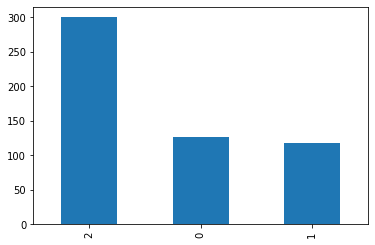

In [8]:
#Visualize the distribution of generations
df['generation'].value_counts().plot.bar()

# Geometrical and Statistical Analysis of the Data

In [9]:
#let's see if between the unknown generation, there are cars registered in 2015. In this case, these cars are affiliated to G. I
df.groupby(['generation'])['year'].value_counts()

generation  year
0           2016    114
            2017     13
1           2015     65
            2016     48
            2017      5
2           2019    219
            2018     81
Name: year, dtype: int64

No immediate conclusion could be taken on the cars with unknown generation since no one is registered in 2015

In [10]:
df_I = df[df['generation'] == 1]
df_II = df[df['generation'] == 2]
df_0= df[df['generation'] == 0]

In [11]:
df_I.describe()

,generation,year,price,km
count,118.0,118.000000,118.000000,118.000000
mean,1.0,2015.491525,16153.101695,52826.889831
std,0.0,0.580977,2048.718413,19474.468385
min,1.0,2015.000000,12890.000000,19001.000000
25%,1.0,2015.000000,14990.000000,38353.250000
50%,1.0,2015.000000,15645.000000,48948.500000
75%,1.0,2016.000000,16940.000000,75000.000000
max,1.0,2017.000000,22290.000000,106719.000000


75% of cars with generation I are registered in 2016, of prices 16940, and have travelled 75000km

In [12]:
df_II.describe()

,generation,year,price,km
count,300.0,300.000000,300.000000,300.000000
mean,2.0,2018.730000,27549.926667,8884.176667
std,0.0,0.444701,1650.094290,10189.487157
min,2.0,2018.000000,23490.000000,0.000000
25%,2.0,2018.000000,26430.000000,10.000000
50%,2.0,2019.000000,27490.000000,4022.000000
75%,2.0,2019.000000,28502.500000,18100.000000
max,2.0,2019.000000,33990.000000,36130.000000


75% of cars with generation II are registered in 2019, of prices 28502, and have travelled 18100km

In [13]:
df_0.describe()

,generation,year,price,km
count,127.0,127.000000,127.000000,127.000000
mean,0.0,2016.102362,17467.370079,40668.976378
std,0.0,0.304325,2163.442193,16558.647792
min,0.0,2016.000000,13990.000000,13757.000000
25%,0.0,2016.000000,15990.000000,31537.000000
50%,0.0,2016.000000,17290.000000,35000.000000
75%,0.0,2016.000000,17990.000000,47093.500000
max,0.0,2017.000000,22290.000000,94415.000000


75% of cars with generation 0 are registered in 2017, of prices 17990, and have travelled 47039km

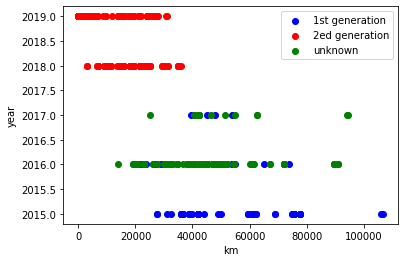

In [14]:
# km and year combination
plt.figure()
plt.scatter(df[df["generation"]==1]["km"].values, df[df["generation"]==1]["year"].values, color="b",label="1st generation")
plt.scatter(df[df["generation"]==2]["km"].values, df[df["generation"]==2]["year"].values, color="r",label="2ed generation")
plt.scatter(df[df["generation"]==0]["km"].values, df[df["generation"]==0]["year"].values, color="g", label="unknown")
plt.xlabel("km")
plt.ylabel("year")
plt.legend(loc="upper right")
plt.show()

The cars with unknown generation are close to those of first generation 

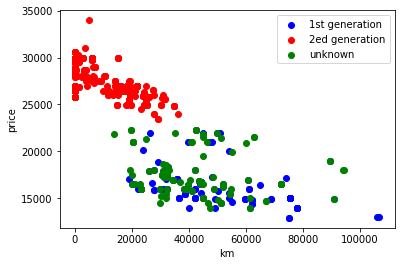

In [15]:
# km and price combination
plt.figure()
plt.scatter(df[df["generation"]==1]["km"].values, df[df["generation"]==1]["price"].values, color="b",label="1st generation")
plt.scatter(df[df["generation"]==2]["km"].values, df[df["generation"]==2]["price"].values, color="r",label="2ed generation")
plt.scatter(df[df["generation"]==0]["km"].values, df[df["generation"]==0]["price"].values, color="g", label="unknown")
plt.xlabel("km")
plt.ylabel("price")
plt.legend(loc="upper right")
plt.show()

Same conclusion: The cars with unknown generation are close to those of first generation

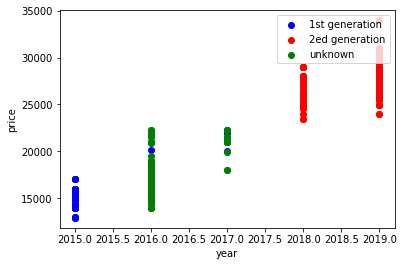

In [16]:
# year and price combination
plt.figure()
plt.scatter(df[df["generation"]==1]["year"].values, df[df["generation"]==1]["price"].values, color="b",label="1st generation")
plt.scatter(df[df["generation"]==2]["year"].values, df[df["generation"]==2]["price"].values, color="r",label="2ed generation")
plt.scatter(df[df["generation"]==0]["year"].values, df[df["generation"]==0]["price"].values, color="g", label="unknown")
plt.xlabel("year")
plt.ylabel("price")
plt.legend(loc="upper right")
plt.show()

In [17]:
#basic method: calculate the Euclidean distance:
df1 = df_0.drop(['generation'], axis= 1)   #drop generation feature
i=0 
le=df_0.shape[0]
f1=0  #number of cars in unknown generation expected to belong to 1st generation #initialization
f2=0  #number of cars in unknown generation expected to belong to 1st generation #initialization
for i in range(le):
    if LA.norm(df1.iloc[i, :].values - np.array([df_I['year'].mean(), df_I['price'].mean(), df_I['km'].mean()]))< LA.norm(df1.iloc[1, :] - np.array([df_II['year'].mean(), df_II['price'].mean(), df_II['km'].mean()])):
        f1+=1
    else:
        f2+=1
print("the number of cars with unknown generation expected belonging to first generation is", str(f1) + "\n" "the number of cars with unknown generation expected belonging to second generation is ",  str(f2)) 

the number of cars with unknown generation expected belonging to first generation is 127
the number of cars with unknown generation expected belonging to second generation is  0


# Predict generation using tools from MachineLearning

In [18]:
#separate train and test data
train_df = df[(df["generation"]==1) | ( df["generation"]==2)]
test_df = df[df["generation"]==0]
train_set, train_label = train_df[["year","price","km"]].values, train_df["generation"].values
test_set = test_df[["year","price","km"]].values

In [19]:
#normalize data
def handle_year(df):
  df["year"] = df["year"] - df["year"].min()
  return df

from sklearn.preprocessing import MinMaxScaler

df = handle_year(df)
scaler = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
precisions = accs = recall = []
# for model evaluation

clf = GradientBoostingClassifier()
precisions = cross_val_score(clf, train_set_scaled, train_label, cv=5, scoring="precision")
accs = cross_val_score(clf, train_set_scaled, train_label, cv=5, scoring="accuracy")
recall = cross_val_score(clf, train_set_scaled, train_label, cv=5, scoring="recall")




# for the application
clf.fit(train_set_scaled, train_label)
predictions = clf.predict(test_set_scaled)

In [22]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

    Conclusion: all cars with unknown generation are then estimated to belong to first generation.